In [185]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
%matplotlib inline
plt.style.use('ggplot')  #使用该风格
plt.rcParams['axes.unicode_minus']=False #正常显示负号
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
os.chdir('/Users/lyn/Library/Mobile Documents/com~apple~CloudDocs/Documents/jupyter/')  #定义相对路径

In [181]:
#读取数据并检查空值
rb=pd.read_csv('redbook.csv') 
rb.info()
rb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      1247 non-null   float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


revenue                        0
gender                     11729
age                        28205
engaged_last_30            11729
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64

- gender、age、engaged_last_30有空值，age空值过多，考虑drop,其余两列根据实际情况考虑fill或者drop;
- lifecycle是类别型变量；

In [182]:
rb.head() #查看数据，gender、engaged_last_30、lifecycle、3rd_party_stores的取值需要关注；

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,NaN,0.0,B,4.26,2343.870,0
1,200.99,0.0,20.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,NaN,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [170]:
print(rb.lifecycle.unique(),'\n')
print(rb.gender.unique(),'\n')
print(rb.engaged_last_30.unique(),'\n')
print(sorted(rb['3rd_party_stores'].unique()),'\n')
#lifecycle 只有B、A、C三类元素，其他三个只有0，1，空三个类型,3rd_party_stores取值为0-10
#考虑到gender、engaged_last_30是0/1数字型变量，填充对样本影响太大，而非空数据量足够，故剔除空值；
#lifecycle A、B、C分别表示6个月内注册、最近6个月-1年内注册、最近1-2年内注册的
#gender 0代表女性，1代表男性
#engaged_last_30，1代表30天内有参与活动，0代表没有；
#3rd_party_stores 在第三方商家购买的订单数量

['B' 'A' 'C'] 

[ 0. nan  1.] 

[ 0. nan  1.] 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 



In [158]:
rb.columns  
#列名中含有空格，需要去掉

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')

In [161]:
rb1=rb.drop('age',axis=1)    #drop掉age列
rb2=rb1.dropna()     #drop掉NA数据
rb3=rb2.rename(columns=lambda x:x.strip())   #列名去掉空格
rb3.info()            #数据清洗完毕
rb3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17723 entries, 0 to 29450
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   revenue                17723 non-null  float64
 1   gender                 17723 non-null  float64
 2   engaged_last_30        17723 non-null  float64
 3   lifecycle              17723 non-null  object 
 4   days_since_last_order  17723 non-null  float64
 5   previous_order_amount  17723 non-null  float64
 6   3rd_party_stores       17723 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


,revenue,gender,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,0.0,B,4.26,2343.870,0
1,200.99,0.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,0.0,C,4.29,1687.646,1
5,319.99,0.0,0.0,C,15.13,2811.491,10
6,140.00,0.0,0.0,C,11.45,769.990,4


In [167]:
rb3.pivot_table(columns=['gender'],
                values=['revenue',
                        'previous_order_amount',
                        '3rd_party_stores',
                        'days_since_last_order',
                        'engaged_last_30'],
                index='lifecycle',
                aggfunc={'revenue':'mean',
                         'previous_order_amount':'mean',
                         '3rd_party_stores':'mean',
                         'days_since_last_order':'mean',
                         'engaged_last_30':'mean'}) 

3rd_party_stores           days_since_last_order             \
gender                 0.0       1.0                   0.0        1.0   
lifecycle                                                               
A                  0.00000  0.000000              0.487288   0.479148   
B                  0.00000  0.000000              2.505665   2.582117   
C                  3.02219  2.904789              9.992782  10.043687   

          engaged_last_30           previous_order_amount               \
gender                0.0       1.0                   0.0          1.0   
lifecycle                                                                
A                0.073957  0.108067           3031.721573  3600.478447   
B                0.077424  0.111876           2832.461526  3205.113687   
C                0.061598  0.077034           2195.166353  2440.555508   

              revenue              
gender            0.0         1.0  
lifecycle                          
A          396.812839  411.786811  
B          348.612557  391.261430  
C          380.804297  396.626971

- 3rd_party_stores：0为女性，1为男性，3rd_party_stores：ABC三个用户群体中AB没有第三方商家购买，而C平均有3个商铺，男女无显著差异；
- days_since_last_order：用户平均最近购买时间C>B>A，男女无显著差异，说明注册时间越久，购买频次越低；
- engaged_last_30:用户最近30天平均参与活动次数A、B>C，且女性参与频率高于男性，说明女性更愿意参与活动，用户注册时间越久，活动参与度越低；
- previous_order_amount：用户平均最近一次消费金额值A>B>C,女性低于男性，注册时间越久最后一次消费金额越低；
- revenue：ABC差异不大，女性来源用户平均收入低于男性来源；

In [ ]:
rb3.pivot_table(columns=['gender'],
                values=['revenue','previous_order_amount','3rd_party_stores','days_since_last_order'],
                index='lifecycle',
                aggfunc={'revenue':'mean','previous_order_amount':'mean','3rd_party_stores':'mean','days_since_last_order':'mean'}) 

In [169]:
#查看性别和销售收入的关系
rb.groupby(['lifecycle','gender'])['revenue'].describe() 

count        mean         std   min      25%      50%  \
lifecycle gender                                                           
A         0.0     1582.0  396.812839  857.188464  1.00  71.9675  170.485   
          1.0      657.0  411.786811  781.529697  0.83  62.9900  169.990   
B         0.0     2609.0  348.612557  499.974915  1.00  70.9700  166.960   
          1.0     1162.0  391.261430  538.356966  1.00  75.9600  189.485   
C         0.0     8247.0  380.804297  666.995396  0.02  72.9100  164.950   
          1.0     3466.0  396.626971  605.737796  1.00  78.4300  185.965   

                       75%       max  
lifecycle gender                      
A         0.0     450.7475  22214.92  
          1.0     487.9600  11730.37  
B         0.0     419.4180   7114.18  
          1.0     499.9875   6550.94  
C         0.0     488.9700  29080.80  
          1.0     499.9900  16500.00

- ABC三类用户数量C>B>A,2/3以上的用户是最近1-2年内注册的，其次是最近6个月-1年内和6个月内的；
- 女性数量均远高于男性，说明APP以女性用户为主；
- 各群体平均销售收入，女性略低于男性，但最大销售金额女性远高于男性，说明女性比男性消费频次更高，客单价略低；
- 6个月内用户的平均消费金额最高，

In [173]:
#查看各因素相关关系；
rb.corr().sort_values('revenue',ascending=False) 

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
revenue,1.000000,0.014944,-0.008323,0.080031,0.036754,0.168186,-0.026102
previous_order_amount,0.168186,0.058450,-0.005826,0.163554,-0.084661,1.000000,-0.213778
engaged_last_30,0.080031,0.038782,-0.000008,1.000000,-0.005964,0.163554,-0.031189
days_since_last_order,0.036754,0.000063,-0.012576,-0.005964,1.000000,-0.084661,0.351752
gender,0.014944,1.000000,-0.010074,0.038782,0.000063,0.058450,-0.013846
age,-0.008323,-0.010074,1.000000,-0.000008,-0.012576,-0.005826,-0.017412
3rd_party_stores,-0.026102,-0.013846,-0.017412,-0.031189,0.351752,-0.213778,1.000000


- previous_order_amount（累积购买金额），engaged_last_30（最近1月内有无参与活动），days_since_last_order（最近下单距今天数）这三个变量和销售收入相关性最该，其中以previous_order_amount最高；
- 3rd_party_stores与revenue负相关

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a42545110>,
      dtype=object)

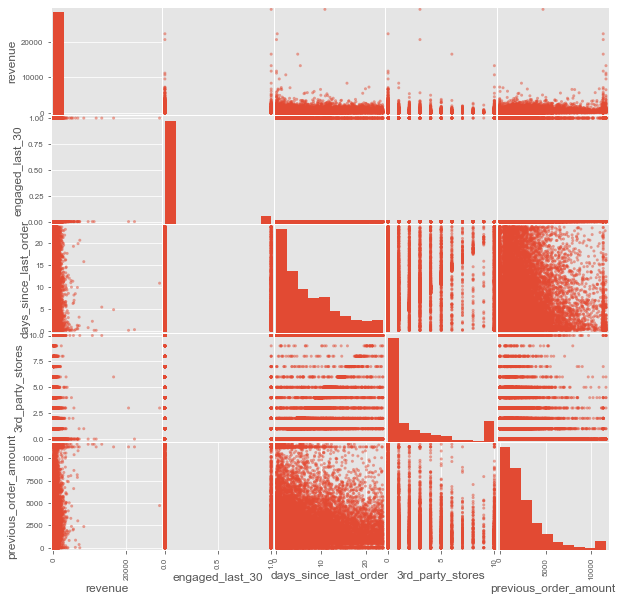

In [219]:
#矩阵查看previous_order_amount（累积购买金额），engaged_last_30（最近1月内有无参与活动），days_since_last_order、Revenue的变量关系
pd.plotting.scatter_matrix(rb3[['revenue',
                                'engaged_last_30',
                                'days_since_last_order',
                                '3rd_party_stores',
                                'previous_order_amount']],figsize=(10,10))

- prevous_order_amount和days_since_last_order有负相关；
- previous_order_amount（累积购买金额），engaged_last_30（最近1月内有无参与活动），days_since_last_order与Revenue关系直观上不显著；
- 3rd_party_stores与revenue负相关

In [220]:
#建立线性回归模型：previous_order_amount、engaged_last_30和revenue
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=rb3['revenue']                     #定义X
x=rb3[['previous_order_amount','engaged_last_30']]  #定义Y
model.fit(x,y)        #回归建模   
print('斜率:',model.coef_,'\n') 
print('截距:',model.intercept_,'\n')  
r2=model.score(x,y)
print('确定系数：',r2,'\n')   #确定系数，0.048拟合效果一般
from statsmodels.formula.api import ols #调用标准的模型输出表
modelo=ols('y~x',rb3).fit()
print(modelo.summary()) # #P值满足标准

斜率: [5.41411618e-02 1.15404438e+02] 

截距: 237.01552924001948 

确定系数： 0.048087693757601024 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     447.6
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          2.34e-190
Time:                        13:57:22   Log-Likelihood:            -1.3951e+05
No. Observations:               17723   AIC:                         2.790e+05
Df Residuals:                   17720   BIC:                         2.791e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [238]:
#优化模型，添加days_since_last_order
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=rb3['revenue']                     #定义X
x=rb3[['previous_order_amount','engaged_last_30','days_since_last_order']]  #定义Y
model.fit(x,y)        #回归建模   
print('斜率:',model.coef_,'\n') 
print('截距:%.1f'%model.intercept_,'\n')  
print('线性方程为:y=%.1f*previous_order_amount+%.1fengaged_last_30+%.1fdays_since_last_order+%.1f'%(model.coef_[0],model.coef_[1],model.coef_[2],model.intercept_))
r2=model.score(x,y)
print('确定系数：',r2,'\n')   #确定系数，0.054，效果提升
from statsmodels.formula.api import ols #调用标准的模型输出表
modelo=ols('y~x',rb3).fit()
print(modelo.summary()) 

斜率: [5.60069175e-02 1.13667032e+02 8.27464312e+00] 

截距:172.7 

线性方程为:y=0.1*previous_order_amount+113.7engaged_last_30+8.3days_since_last_order+172.7
确定系数： 0.054278348702676005 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     339.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          4.67e-214
Time:                        14:25:54   Log-Likelihood:            -1.3945e+05
No. Observations:               17723   AIC:                         2.789e+05
Df Residuals:                   17719   BIC:                         2.789e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std er

- 选用第二个模型: y = 0.1*previous_order_amount+113.7engaged_last_30 + 8.3days_since_last_order + 172.7
- 未下过单，累计购买金额为0，过去30天未参与活动的用户的首次消费金额为172.7元；
- 过去累计消费增加1元,下次消费额增加0.1元；过去30天参加过活动，下次消费额增加113.7元，上一单距今每多1天，下次消费增加8.3元；
- 根据此模型，过去30天参加过活动的用户是重要价值客户，需要重点跟进促进转化，其次是长时间未消费的用户，需要定期刺激召回；历史高消费的客户根据用户成长体系提供增值服务；更具体的用户分群还要参考RFM等模型以及其他标签；